# 1. matplotlib
## figure与subplot
- 创建新的空图形窗口：fig = plt.figure()；
- 创建subplot：
    - ax1 = fig.add_subplot(2, 3, 1)，表示2行3列的第1张；
    - fig, axes = plt.subplots(2, 3)，返回一个含有已创建subplot对象的numpy数组，通过索引来获得第几张图
        - 尺寸：figsize=(3, 4)；
        - sharex, sharey：所有subplot使用相同的x，y轴刻度；
- 若不指定图形句柄ax，直接plt.plot(...)，则默认在当前subplot上绘制；
- plt.subplots_adjust(left=, bottom, right=, top=, wspace=, hspace=)：设置外边距、内间隔，wspace和hspace分别控制sublot水平和竖直间距；

## 图形属性设置
- 曲线参数：
    - 曲线颜色color
    - 线型linestyle
    - 标记marker
    - 线粗细linewidth=，散点大小s=
    - 颜色填充plt.fill(x, y, 'r')
    - 两条曲线之间填充颜色plt.fill_between(x, y_higher, y_lower, facecolor='red')
    - 透明度alpha=
    - 线型图中，非实际数据点默认按线性方式插值，可设置drawstyle=
- 文字类：
    - 刻度：plt.xticks([])/ax.set_xticks([])
    - 刻度标签：ax.set_xticklabels([], rotation=, fontsize=)
        - fig.autofmt_xdate(rotation=)：刻度旋转
    - 刻度范围：plt.axis([xmin, xmax, ymin, ymax])、plt.xlim([xmin, xmax])/ax.set_xlim()
    - 标题：plt.title('')/ax.set_title('')
    - x轴标题：plt.xlabel('')/ax.set_xlabel('')
    - 坐标轴不可见：frame = plt.gca(); frame.axes.get_xaxis().set_visible(False)
    - 创建图例label=，显示图例plt.legend(loc='best')/ax.legend()
    - 添加文本：plt.text(xposition, yposition, 'text')/ax.text()
    - 添加箭头：ax.arrow()
    - 添加注释：ax.annotate()
    - 添加图形：ax.add_patch(...)

## 图表的保存
- plt.savefig('filename', dpi=, bbox_inches='tight', facecolor=, edgecolor=)
    - dpi=：分辨率
    - bbox_inches：图表外围空白部分
    - facecolor/edgecolor：背景色，默认'w'白色

## matplotlib系统配置
- matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息；但几乎所有默认行为都能通过一组全局参数进行自定义；一种python编程方式配置系统的方法是使用rc方法；
- rc的第一个参数是希望自定义的对象，如'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend'等，其后可跟上一系列的关键字参数；可把这些选项写成一个字典；
    - plt.rc('figure', figsize=())
    - font_options = {'family': monospace, 'weight': 'bold'}; plt.rc('font', **font_options)


# 2. pandas内置方法
- 从Series和DataFrame绘制图形；
- 传递给matplotlib；
- Series：以index为x轴；可通过use_index=False禁用，则以从0开始的整数序列为x；
- DataFrame：以index为x，columns为legend，在一张图中绘制对应各列的一系列曲线；
- 线型图frame.plot()
    - subplots=True，则分别绘制在多张subplot内；
    - legend=False，则不显示图例；
    - title=''，添加标题；
    - sort_columns=，以字母表顺序绘制各列，默认使用当前顺序；
- 柱状图frame.plot.bar()、frame.plot.barh()
    - stacked=True，堆积图；
- 直方图data.plot.hist()
- 密度图data.plot.density()


# 3. seaborn
- 对于在绘制图形前需要进行合计的数据，使用seaborn可减少工作量
- sns.barplot(x=, y=, data=, orient='h')：柱状图
- sns.distplot(data, bins=)：同时画出直方图和连续密度估计图
- sns.regplot(x=, y=, data=)：散布图和线性回归线
- sns.pairplot(data, diag_kind='kde', plot_kws=)：散布图矩阵，同时观察一组变量的散布图，支持在对角线放置每个变量的直方图或密度估计；
- sns.factorplot(x=, y=, kind='bar/box', data=)：分面图，针对多个分类变量的数据；

<IPython.core.display.Javascript object>


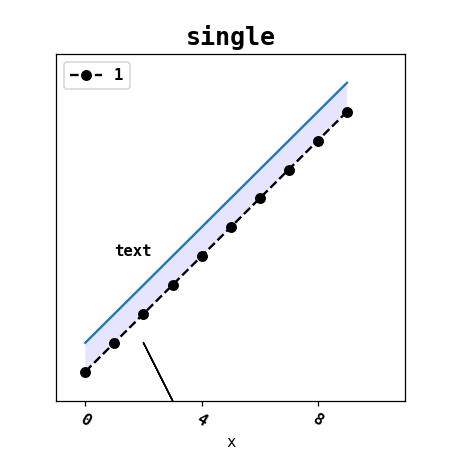

<IPython.core.display.Javascript object>


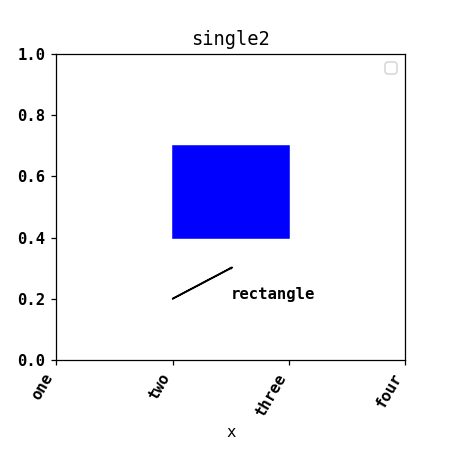

No handles with labels found to put in legend.


In [110]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
y = x + 3
h = plt.plot(x, y, 'ko--', label='1')
plt.xlim([-1, 10])
plt.axis([-1, 11, 2, 14])
plt.title('single', fontsize=16, weight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([0, 4, 8], rotation=-30)
plt.legend(loc='best')
plt.text(1, 7, 'text')
plt.arrow(2, 4, 1, -2)
#plt.Rectangle((1, 10), 1, 2, color='b')
#plt.add_patch(rec)

frame = plt.gca() #一定要有这行代码
frame.axes.get_yaxis().set_visible(False)

plt.plot(x, x + 4)

plt.fill_between(x, x+4, x+3, facecolor='blue', alpha=0.1)



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rec = plt.Rectangle((0.2, 0.4), 0.2, 0.3, color='b')
ax.add_patch(rec)
ax.set_xlim([0, 0.6])
ax.set_xticks([0, 0.2, 0.4, 0.6])
ax.set_xticklabels(['one', 'two', 'three', 'four'], rotation=30)
fig.autofmt_xdate(rotation=60) #与上一行功能类似
#ax.set_axis([0, 1.1, 0, 1.1])
ax.set_title('single2')
ax.set_xlabel('x')
ax.legend()
ax.text(0.3, 0.2, 'rectangle')
ax.arrow(0.2, 0.2, 0.1, 0.1)


<IPython.core.display.Javascript object>


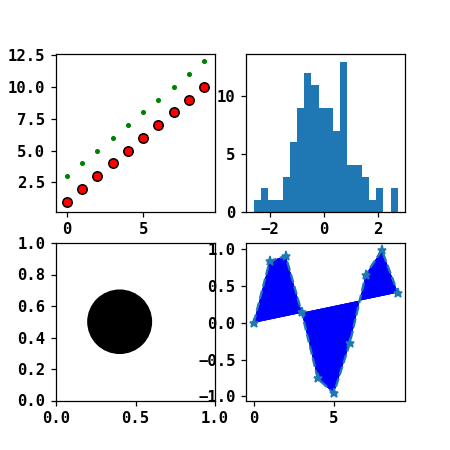

In [131]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

x = np.arange(10)
plt.plot(x, np.sin(x), '*--')

ax1.scatter(x, x + 3, s=5, color='g')
ax1.scatter(x, x + 1, facecolor='red', edgecolor='black')

ax2.hist(np.random.randn(100), bins=20)

cir = plt.Circle((0.4, 0.5), 0.2, color='k')
ax3.add_patch(cir)

plt.rc('figure', figsize=(4, 4))

font_options = {'weight': 'bold', 'family': 'monospace'}
plt.rc('font', **font_options)

<IPython.core.display.Javascript object>


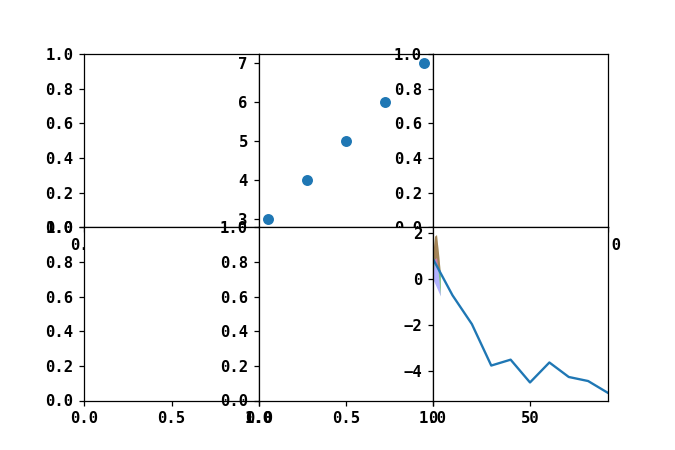

In [158]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(6, 4))
ax2 = axes[0, 1]
x = np.arange(5)
ax2.scatter(np.arange(5), np.arange(5) + 3)
plt.subplots_adjust(wspace=0, hspace=0)

plt.fill(x, np.sin(x), 'b', alpha=0.3)
plt.fill(x, np.sin(x)+1, 'r', alpha=0.3)
plt.fill_between(x, np.sin(x)+1, np.sin(x), facecolor='green', alpha=0.5)

#ax1 = axes[0, 0]
#ax1.fill_between(x, x+3, x+2，facecolor='blue')


#plt.savefig('matplotlib.png', dpi=300, bbox_inches='tight')

# 2. pandas内置方法seaborn


<IPython.core.display.Javascript object>


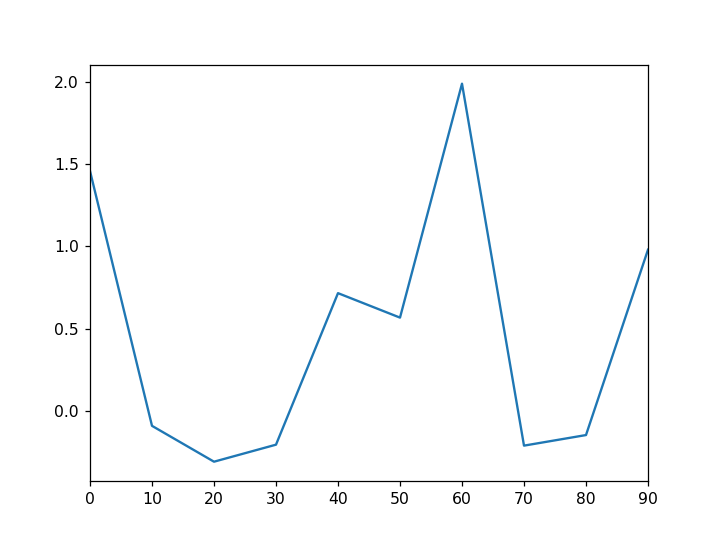

<IPython.core.display.Javascript object>


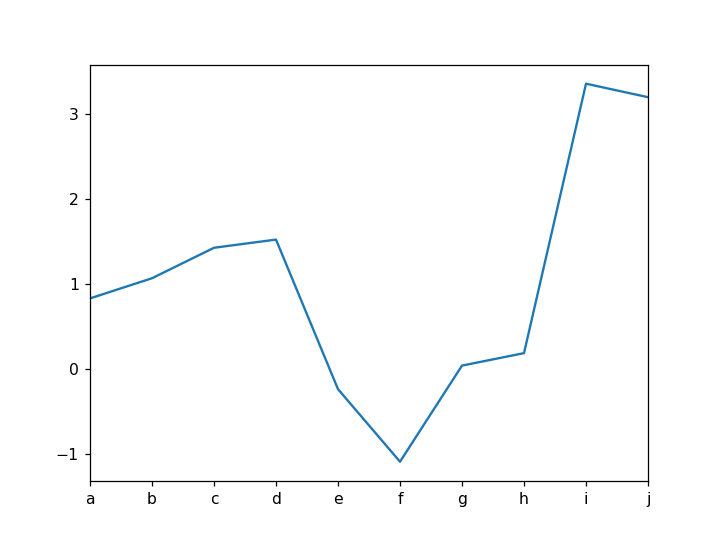

<IPython.core.display.Javascript object>


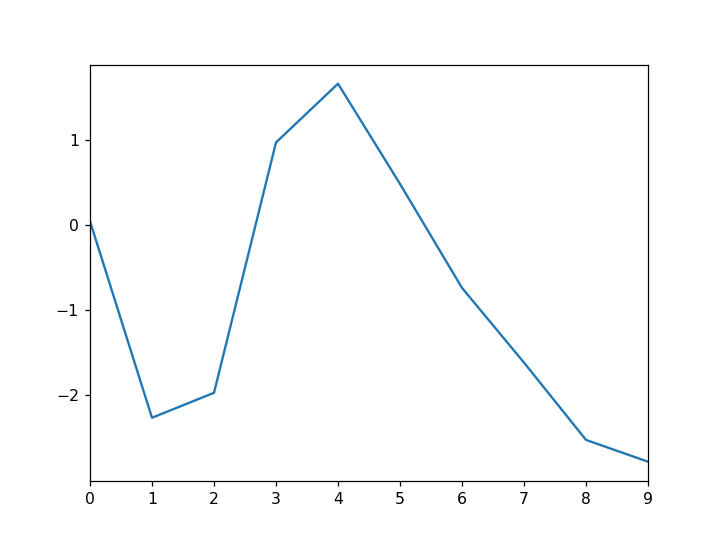

<IPython.core.display.Javascript object>


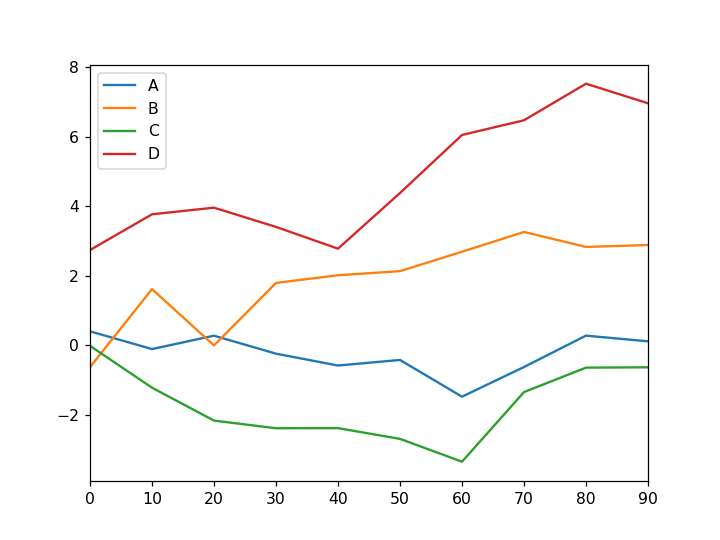

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pandas import Series as Ser, DataFrame as DF
import numpy as np

s = Ser(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

plt.figure()
s2 = Ser(np.random.randn(10).cumsum(), index=list('abcdefghij'))
s2.plot()

plt.figure()
s3 = Ser(np.random.randn(10).cumsum(), index=list('abcdefghij'))
s3.plot(use_index=False)


<IPython.core.display.Javascript object>


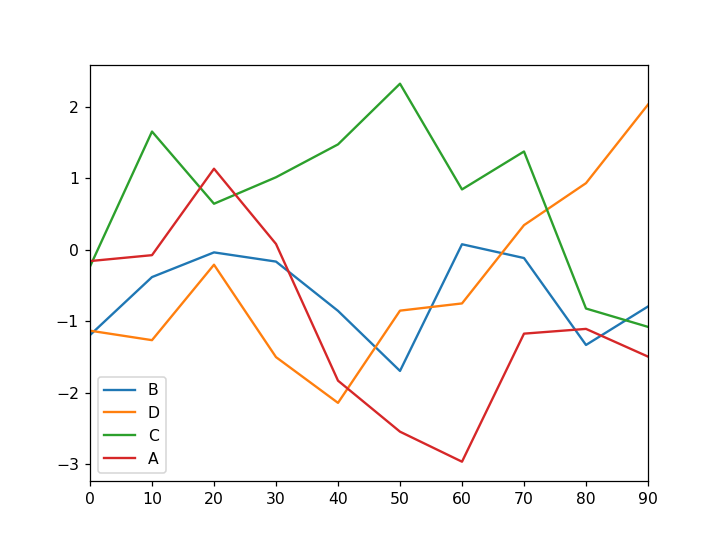

<IPython.core.display.Javascript object>


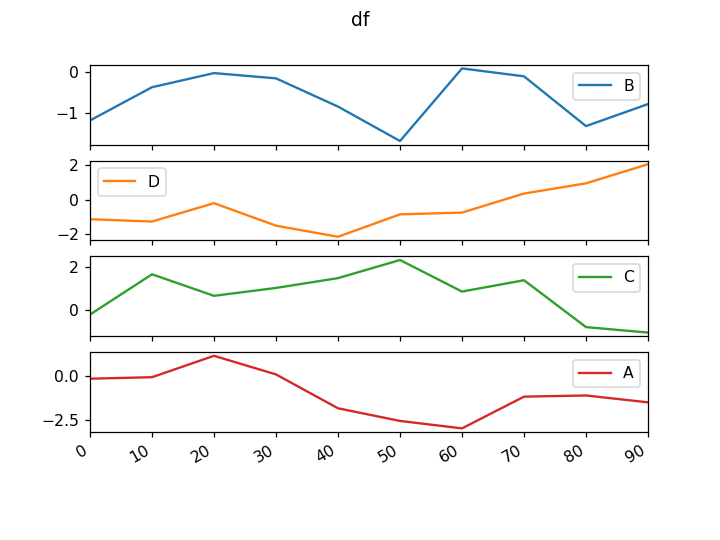

<IPython.core.display.Javascript object>


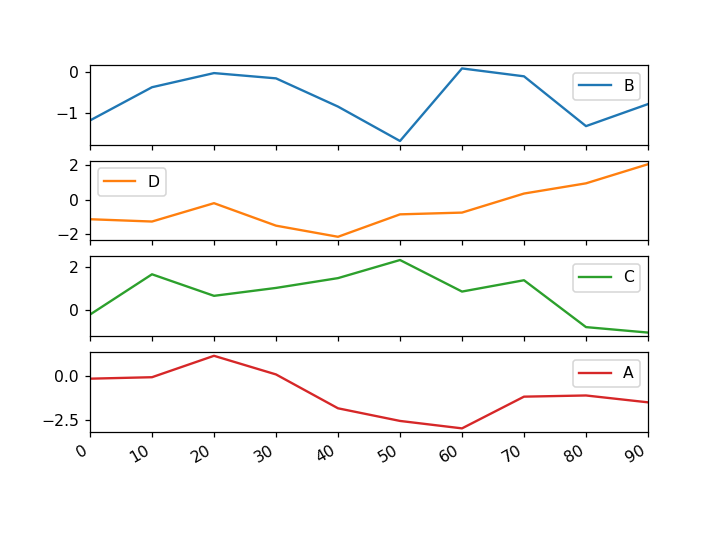

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002F8CF026C08>,
      dtype=object)

In [14]:
%matplotlib notebook
import numpy as np
from pandas import DataFrame as DF

df = DF(np.random.randn(10, 4).cumsum(0),
        columns=['B', 'D', 'C', 'A'],
        index=np.arange(0, 100, 10))
df.plot()

df.plot(subplots=True, title='df')

df.plot(sort_columns=True, subplots=True)

<IPython.core.display.Javascript object>


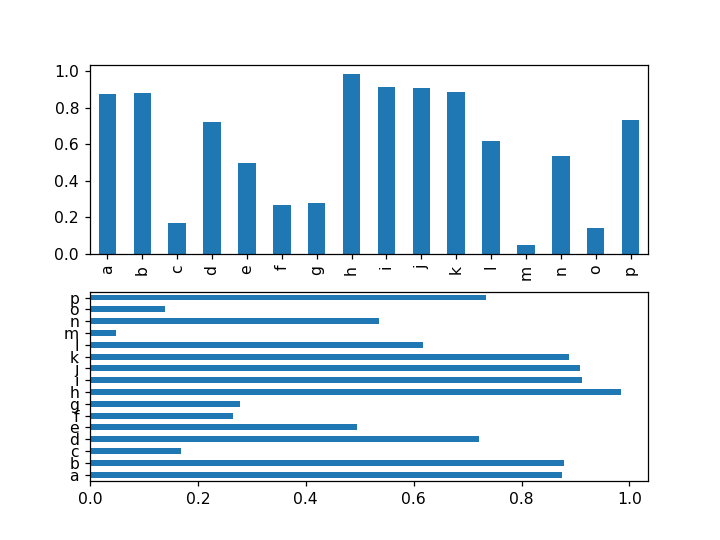

<IPython.core.display.Javascript object>


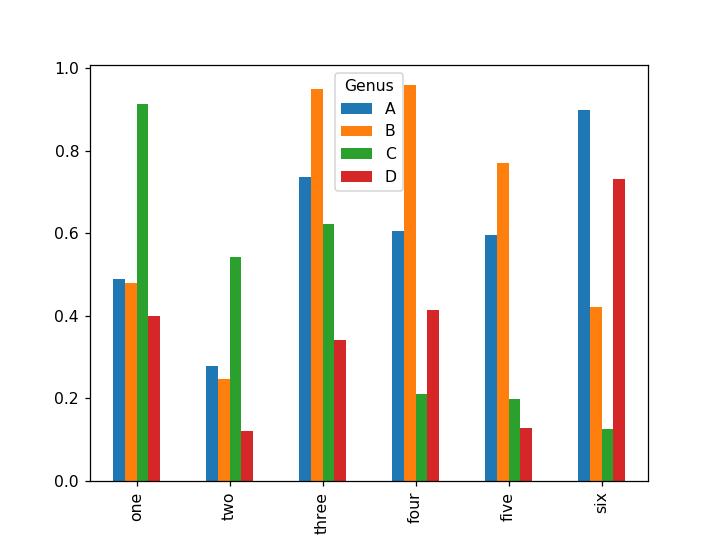

<IPython.core.display.Javascript object>


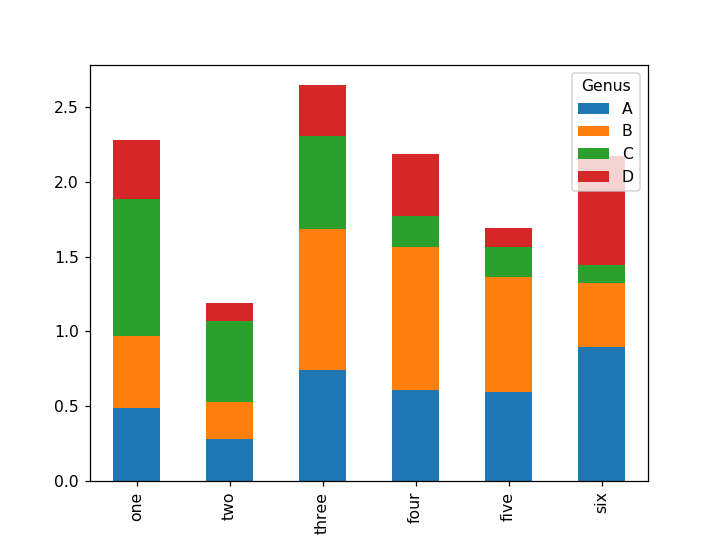

In [19]:
%matplotlib notebook
import numpy as np
import pandas as pd
from pandas import Series as Ser, DataFrame as DF

fig, axes = plt.subplots(2, 1)
s = Ser(np.random.rand(16), index=list('abcdefghijklmnop'))
s.plot.bar(ax=axes[0])
s.plot.barh(ax=axes[1])

df = DF(np.random.rand(6, 4),
        index=['one', 'two', 'three', 'four', 'five', 'six'],
        columns=pd.Index(['A', 'B','C', 'D'], name='Genus'))
df.plot.bar()

df.plot.bar(stacked=True)